In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import dataset
df = pd.read_csv('/workspaces/regularized-linear-regression-project-tutorial/demographic_health_data.csv')

# Explore dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)






   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2       

In [38]:
# Preliminary Analysis
#great numbers only for features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
y_target = df['Heart disease_number']
print(y_target)
#y_target = df['Median_Household_Income_2018']
# Example: Correlation heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


0        3345
1       13414
2        2159
3        1533
4        4101
        ...  
3135     1862
3136      981
3137     1034
3138      500
3139      471
Name: Heart disease_number, Length: 3140, dtype: int64


In [39]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

# Handle missing values
missing_values = df.isna().sum()
print(missing_values)
#df.fillna(df.mean(), inplace=True)


Number of duplicates: 0
fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [40]:
import pandas as pd
#categories
categorical_columns = df.select_dtypes(include=['object']).columns
df_onehot = df[categorical_columns]

df = pd.get_dummies(df, drop_first=True)
df = df.astype(int)

df = df.drop(columns=categorical_columns)


print(df.columns)

KeyError: "['COUNTY_NAME', 'STATE_NAME'] not found in axis"

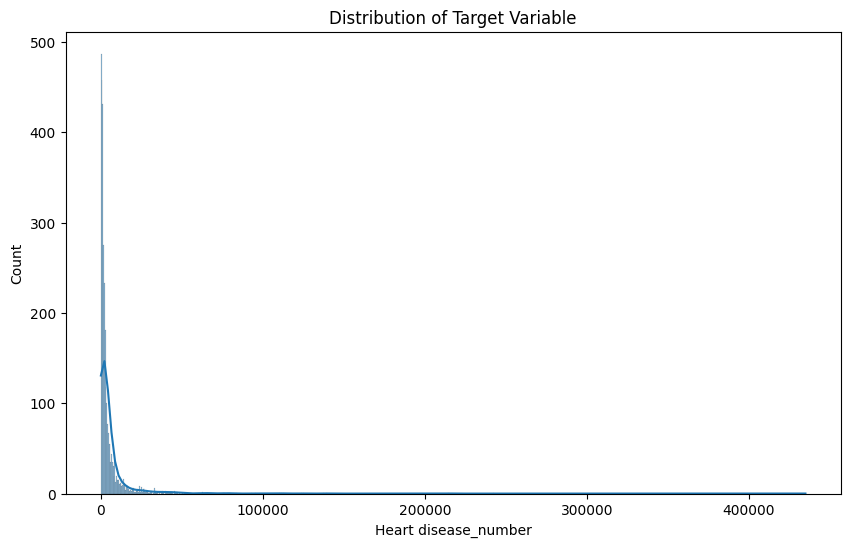

In [20]:
# Further Analysis
# Example: Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_target, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [11]:
print(df.columns)

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'STATE_NAME_South Dakota', 'STATE_NAME_Tennessee', 'STATE_NAME_Texas',
       'STATE_NAME_Utah', 'STATE_NAME_Vermont', 'STATE_NAME_Virginia',
       'STATE_NAME_Washington', 'STATE_NAME_West Virginia',
       'STATE_NAME_Wisconsin', 'STATE_NAME_Wyoming'],
      dtype='object', length=1996)


In [12]:
# Split Dataset
X = df.drop('Heart disease_number', axis=1)
y = y_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

# Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:

# Define and Build Model
model = LinearRegression()

# Train the Model
model.fit(X_train_scaled, y_train)

# Evaluate the Model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.97540847115503e+29
R-squared Score: -2.256952534496275e+21


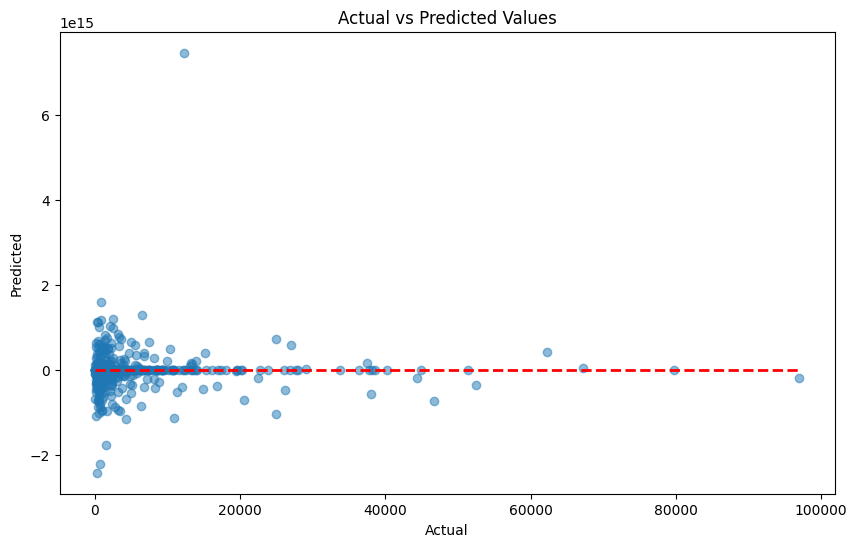

In [15]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [16]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(20))

                                                feature    importance
1301                                COUNTY_NAME_O'Brien  1.591938e+15
1323                                COUNTY_NAME_Olmsted  1.282336e+15
755                                 COUNTY_NAME_Goodhue  1.200199e+15
126                               COUNTY_NAME_Allamakee  1.179609e+15
668                            COUNTY_NAME_Falls Church  1.127011e+15
67    Active Patient Care General Surgeons per 10000...  1.121748e+15
1298                               COUNTY_NAME_Nuckolls  1.118586e+15
328                                  COUNTY_NAME_Bureau  1.036629e+15
1933                        COUNTY_NAME_Yellow Medicine  1.008416e+15
349                                COUNTY_NAME_Callaway  9.724348e+14
274                                  COUNTY_NAME_Bonner  8.378076e+14
177                                  COUNTY_NAME_Attala  8.106247e+14
1828                            COUNTY_NAME_Walla Walla  7.639022e+14
591                 

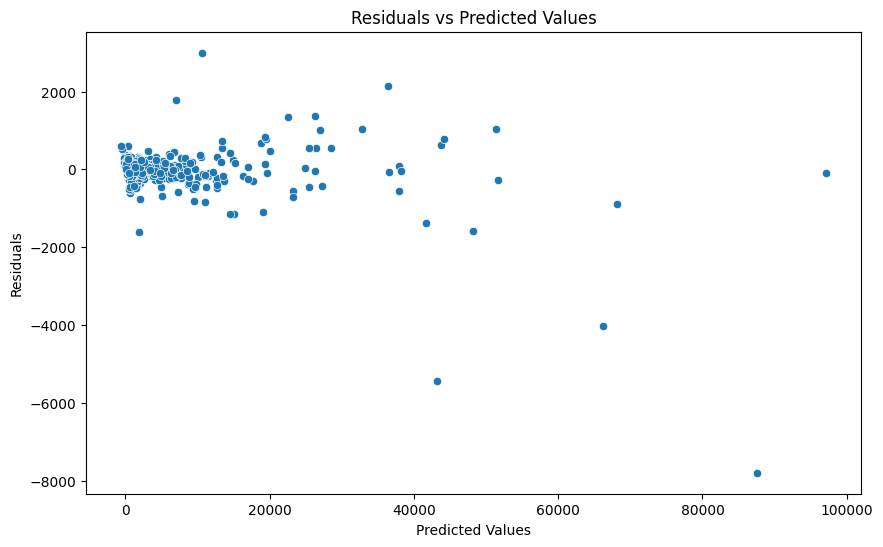

In [33]:
# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

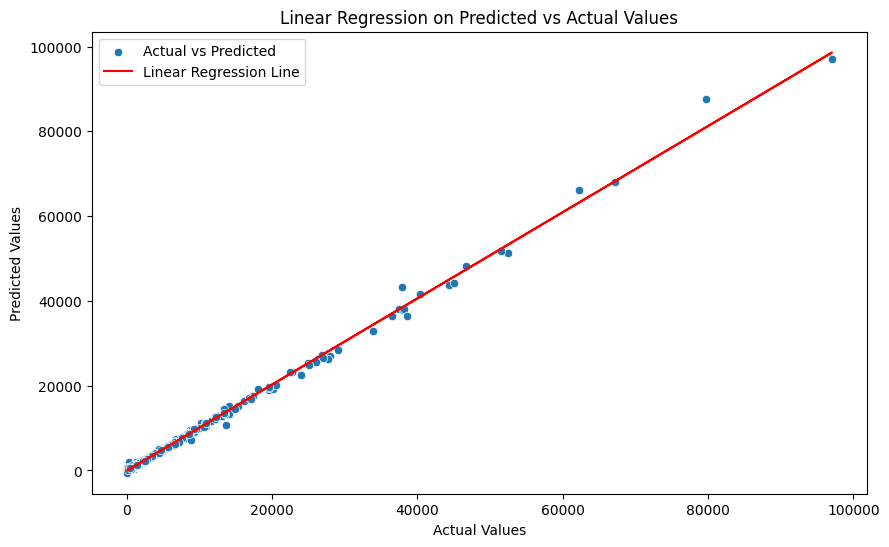

Linear Regression Coefficient: 1.0164655463965866
Linear Regression Intercept: -61.30552071740567


In [34]:

# Step 6: Perform linear regression on the predicted vs actual values
lin_reg = LinearRegression()
lin_reg.fit(y_test.values.reshape(-1, 1), y_pred)

# Step 7: Plot the linear regression line along with the scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
plt.plot(y_test, lin_reg.predict(y_test.values.reshape(-1, 1)), color='red', label='Linear Regression Line')
plt.title('Linear Regression on Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Step 8: Print the linear regression coefficients and intercept
print(f'Linear Regression Coefficient: {lin_reg.coef_[0]}')
print(f'Linear Regression Intercept: {lin_reg.intercept_}')

In [26]:
   from sklearn.linear_model import Lasso
   from sklearn.preprocessing import StandardScaler
   from sklearn.model_selection import train_test_split

   # Assuming X is your feature matrix and y is your target variable
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Standardize features
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)

   # Fit Lasso model
   lasso = Lasso(alpha=.50)  # Adjust alpha to control regularization strength
   lasso.fit(X_train_scaled, y_train)

   # Get feature importances
   feature_importances = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
   print(feature_importances.head(10))

TOT_POP                                  12941.915786
White-alone pop                           4859.169643
Population Aged 60+                       4196.613690
70-79                                     3557.340566
COPD_number                               3529.147111
county_pop2018_18 and older               2960.110685
60-69                                     2290.927687
Internal Medicine Primary Care (2019)     1983.474231
POVALL_2018                               1964.154726
Total Specialist Physicians (2019)        1863.172714
dtype: float64


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 303425.6727
R-squared Score: 0.9965

Feature Coefficients:
                                      Feature   Coefficient
1                                     TOT_POP  12941.915786
76                        Population Aged 60+   4196.613690
16                                      70-79   3557.340566
95                                COPD_number   3529.147111
14                                      60-69   2290.927687
49                                POVALL_2018   1964.154726
73         Total Specialist Physicians (2019)   1863.172714
41    Less than a high school diploma 2014-18   1635.290071
84                        anycondition_number   1579.954835
12                                      50-59   1383.780496
32                          POP_ESTIMATE_2018    888.387777
33                             N_POP_CHG_2018    380.530766
1190                   COUNTY_NAME_Miami-Dade    335.362603
78                                 STATE_FIPS    254.853155
34                   

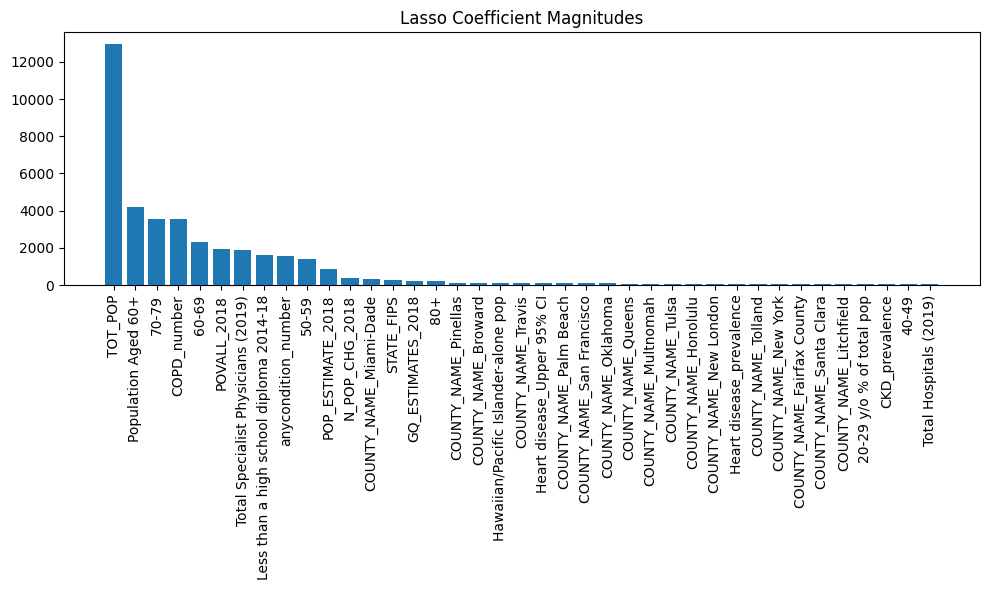

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix and y is your target variable


# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Examine feature coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
coef_df = coef_df[coef_df['Coefficient'] > 50]
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Coefficients:")
print(coef_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(coef_df[coef_df['Coefficient'] > 0]['Feature'], coef_df[coef_df['Coefficient'] > 0]['Coefficient'])
plt.xticks(rotation=90)
plt.title('Lasso Coefficient Magnitudes')
plt.tight_layout()
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.159e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


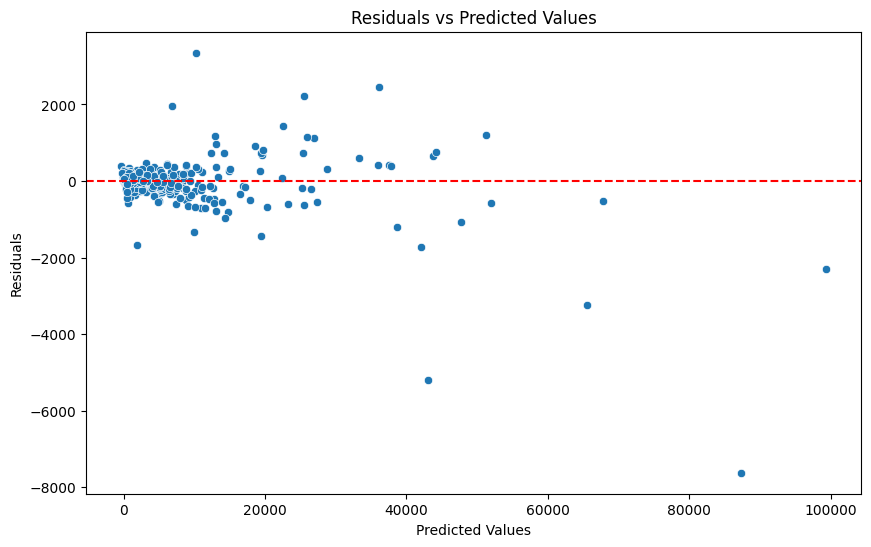

In [35]:
# Step 4: Fit the Lasso regression model
lasso = Lasso(alpha=20.0)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)

# Step 5: Predict the target variable on the test set
y_pred = lasso.predict(X_test)

# Step 6: Calculate the residuals
residuals = y_test - y_pred

# Step 7: Plot the residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

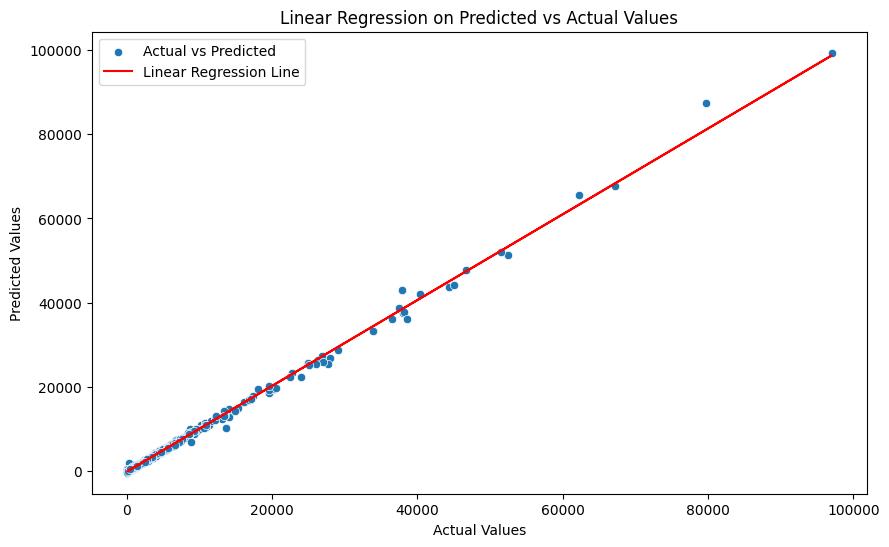

Linear Regression Coefficient: 1.0174871039526951
Linear Regression Intercept: -66.37379007419167


In [36]:
# Step 6: Perform linear regression on the predicted vs actual values
lin_reg = LinearRegression()
lin_reg.fit(y_test.values.reshape(-1, 1), y_pred)

# Step 7: Plot the linear regression line along with the scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
plt.plot(y_test, lin_reg.predict(y_test.values.reshape(-1, 1)), color='red', label='Linear Regression Line')
plt.title('Linear Regression on Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Step 8: Print the linear regression coefficients and intercept
print(f'Linear Regression Coefficient: {lin_reg.coef_[0]}')
print(f'Linear Regression Intercept: {lin_reg.intercept_}')